# 航空公司客户价值分析
---

## 背景与挖掘目标
信息时代的来临使得企业营销焦点从产品中心转变为客户中心，客户关系管理成为企业的核心问题。客户关系管理的关键问题是客户分类，通过客户分类，区分无价值客户、高价值客户，企业针对不同价值的客户制定优化的个性化服务方案，采取不同营销策略，将有限营销资源集中于高价值客户，实现企业利润最大化目标。准确的客户分类结果是企业优化营销资源分配的重要依据，客户分类越来越成为客户关系管理中亟待解决的关键问题之一。
面对激烈的市场竞争，各个航空公司都推出了更优惠的营销方式来吸引更多的客户，国内某航空公司面临着常旅客流失、竞争力下降和航空资源未充分利用等经营危机。通过建立合理的客户价值评估模型，对客户进行分群，分析比较不同客户群的客户价值，并制定相应的营销策略，对不同的客户群提供个性化的客户服务是必须的和有效的。结合该航空公司已积累的大量的会员档案信息和其乘坐航班记录，实现以下目标。
1. 借助航空公司客户数据，对客户进行分类。
1. 对不同的客户类别进行特征分析，比较不同类客户的客户价值。
1. 对不同价值的客户类别提供个性化服务，制定相应的营销策略。

## 分析方法与过程
### 航空公司行业内竞争的现状
民航的竞争除了三大航空公司之间的竞争之外，还将加入新崛起的各类小型航空公司、民营航空公司，甚至国外航空巨头。航空产品生产过剩，产品同质化特征愈加明显，于是航空公司从价格、服务间的竞争逐渐转向对客户的竞争。随着高铁、动车等铁路运输的兴建，航空公司受到巨大冲击。
在客户价值分析领域，最具影响力并得到实证检验的理论与模型有∶客户终生价值理论、客户价值金字塔模型、策略评估矩阵分析法和 RFM客户价值分析模型等。
### 分析步骤与流程
航空客户价值分析案例的流程步骤如下：
1. 抽取航空公司2012年4月1日至2014年3月31日的数据。
2. 对抽取的数据进行数据探索分析与预处理，包括数据缺失值与异常值的探索分析，数据清洗，特征构建，标准化等操作。
3. 基于RFM模型，使用K-Means算法进行客户分群。
4. 针对模型结果得到不同价值的客户，采用不同的营销手段，提供定制化的服务。

![ 航空客运数据分析建模总体流程 ](https://data.educoder.net/api/attachments/2176237 "航空客运数据分析建模总体流程" )

### 数据探索分析

#### 认识数据
从航空公司系统内的客户基本信息、乘机信息以及积分信息等详细数据中，根据末次飞行日期（LAST_FLIGHT_DATE），以2014年3月31日为结束时间，选取宽度为两年的时间段作为分析观测窗口，抽取观测窗口2012年4月1日至2014年3月31日内有乘机记录的所有客户的详细数据形成历史数据，总共62988条记录。其中包含了如会员卡号，入会时间，性别，年龄，会员卡级别，工作地城市，工作地所在省份，工作地所在国家，观测窗口结束时间，观测窗口乘机积分，飞行公里数，飞行次数，飞行时间，乘机时间间隔，平均折扣率等44个属性。
航空公司数据属性如下表所示。
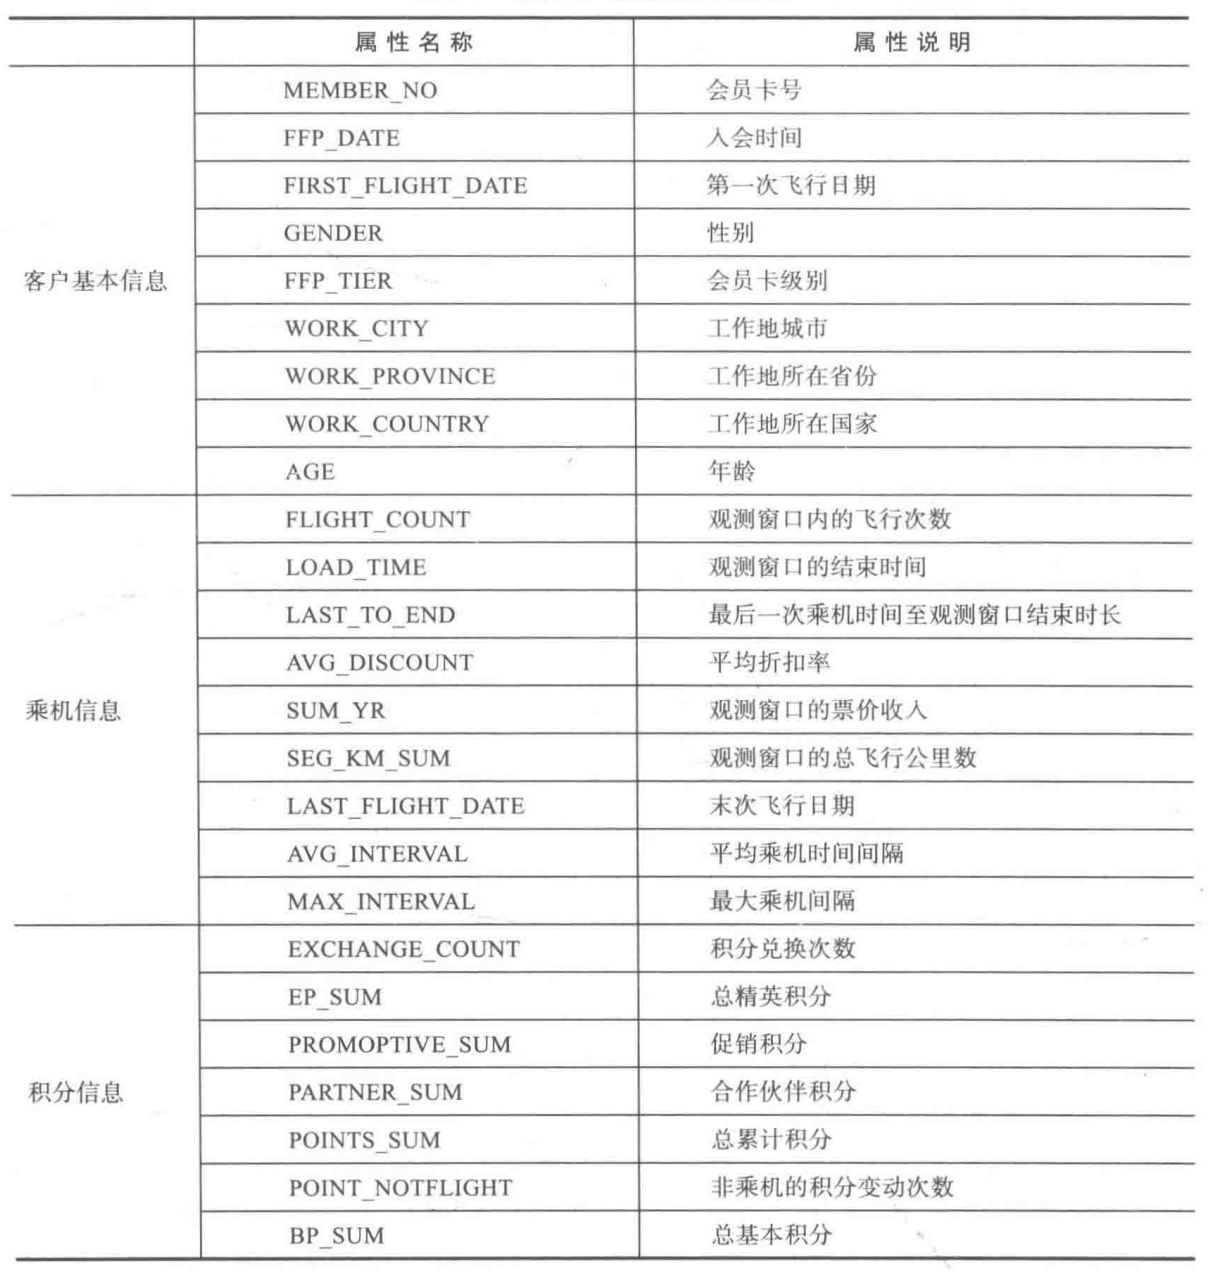

#### 描述性统计分析
通过对原始数据观察发现数据中存在票价为空值的记录，同时存在票价最小值为0、折扣率最小值为0但总飞行公里数大于0的记录。票价为空值的数据可能是客户不存在乘机记录造成。其它的数据可能是客户乘坐0折机票或者积分兑换造成。
查找每列属性观测值中空值个数、最大值、最小值，代码如下。

In [1]:
# 对数据进行基本的探索
# 返回缺失值个数以及最大最小值
import pandas as pd

# 航空原始数据,第一行为属性标签
datafile = 'data1/air_data.csv'
# 数据探索结果表
resultfile = 'data1/explore.csv'  

# 在下面补充代码：读取原始数据文件赋给data变量，读取指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）
data = pd.read_csv(datafile,encoding='utf-8')

# 在下面补充代码：输出数据形状
print(data.shape)

(62988, 44)


In [2]:
# desribe函数输出对数据的基本描述，返回一个数据帧
# 在下面补充代码：将data的基本描述赋给explore变量，并将该变量转置，方便查阅

explore=data.describe(percentiles=[],include='all').T
# describe()函数自动计算非空值数，空值数需要计算（dataframe的减法），增加一列名为null
explore['null'] = len(data)-explore['count']  

# 在下面补充代码：选择explore数据帧的null、max和min列，重赋给explore变量

explore = explore[['null','max','min']]
# 在下面补充代码：将explore数据帧的列索引重命名为空值数、最大值、最小值，然后打印explore
explore.columns = [u'空值记录数',u'最大值',u'最小值']
# to_csv函数可将数据帧导出至csv文件
# 在下面补充代码：导出结果至resultfile变量指向的文件explore.csv
explore.to_csv(resultfile,header=True)
print(explore)


                         空值记录数        最大值    最小值
MEMBER_NO                  0.0    62988.0    1.0
FFP_DATE                     0        NaN    NaN
FIRST_FLIGHT_DATE            0        NaN    NaN
GENDER                       3        NaN    NaN
FFP_TIER                   0.0        6.0    4.0
WORK_CITY                 2269        NaN    NaN
WORK_PROVINCE             3248        NaN    NaN
WORK_COUNTRY                26        NaN    NaN
AGE                      420.0      110.0    6.0
LOAD_TIME                    0        NaN    NaN
FLIGHT_COUNT               0.0      213.0    2.0
BP_SUM                     0.0   505308.0    0.0
EP_SUM_YR_1                0.0        0.0    0.0
EP_SUM_YR_2                0.0    74460.0    0.0
SUM_YR_1                 551.0   239560.0    0.0
SUM_YR_2                 138.0   234188.0    0.0
SEG_KM_SUM                 0.0   580717.0  368.0
WEIGHTED_SEG_KM            0.0  558440.14    0.0
LAST_FLIGHT_DATE             0        NaN    NaN
AVG_FLIGHT_COUNT    

#### 分布分析

分别从客户基本信息、乘机信息、积分信息3个角度进行数据探索，寻找客户信息的分布规律。

**（1）客户基本信息分布分析**

选取客户基本信息中入会时间、性别、会员卡级别和年龄字段进行探索分析，探索客户的基本信息分布状况，代码如下。

In [3]:
# 客户信息类别
# 提取会员入会年份
# 导入Python时间库datetime中表示时间日期的类datetime
from datetime import datetime
# 字符串格式转化为日期函数datetime.strptime
ffp = data['FFP_DATE'].apply(lambda x:datetime.strptime(x,'%Y/%m/%d'))
# 在下面补充代码：打印会员入会时间的前5行
print(ffp.head())
# 将每一个会员的入会年份赋给ffp_year
ffp_year = ffp.map(lambda x : x.year)

0   2006-11-02
1   2007-02-19
2   2007-02-01
3   2008-08-22
4   2009-04-10
Name: FFP_DATE, dtype: datetime64[ns]


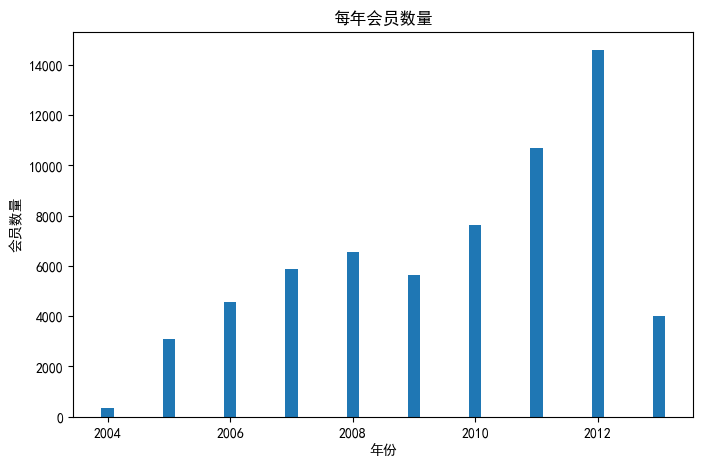

In [4]:
# 绘制各年份会员入会人数条形图
# 在下面补充代码：导入画图所需库
import matplotlib.pyplot as plt
import pandas as pd
# 在下面补充代码：设置宽8英寸，高5英寸的figure
fig = plt.figure(figsize = (8,5))
ax1 = fig.add_subplot(1,1,1)

# 在下面补充代码：配置参数，正常显示正负号
plt.rcParams['axes.unicode_minus']=False
# 在下面补充代码：配置参数，图正常显示黑体中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 在下面补充代码：将会员入会年份ffp_year去重后赋给x变量（x是一个列表）
# 使用辅助集合保持顺序地去重
def remove_duplicates(lst):
    seen = set()
    unique_list = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            unique_list.append(item)
    return unique_list
x = remove_duplicates(ffp_year)

# 在下面补充代码：对x进行由小到大的排序
x.sort()
# 在下面补充代码：将会员入会年份系列ffp_year进行值计数，赋给变量y(y是一个Series）
y = ffp_year.value_counts()
#print(y)


# 在下面补充代码：按照y的索引（年份）进行由小到大排序。
y=y.sort_index()

# 在下面补充代码：x为会员入会年份，y为每一年入会人数，画条形图，柱子宽度为0.2，颜色R：0x05，G：0x04，B：0xaa
ax1.bar( x,y.values , width = 0.2 ) #     ,color=[0x05,0x04,0xaa]
# 在下面补充代码：x轴标签设置为“年份”，y轴标签设置为“会员数量”，图标题设置为“每年会员数量”
plt.xlabel("年份")
plt.ylabel("会员数量")
plt.title("每年会员数量")
plt.show()

从直方图可以看出，入会人数随年份的增长而增加，在2012年达到最高峰。

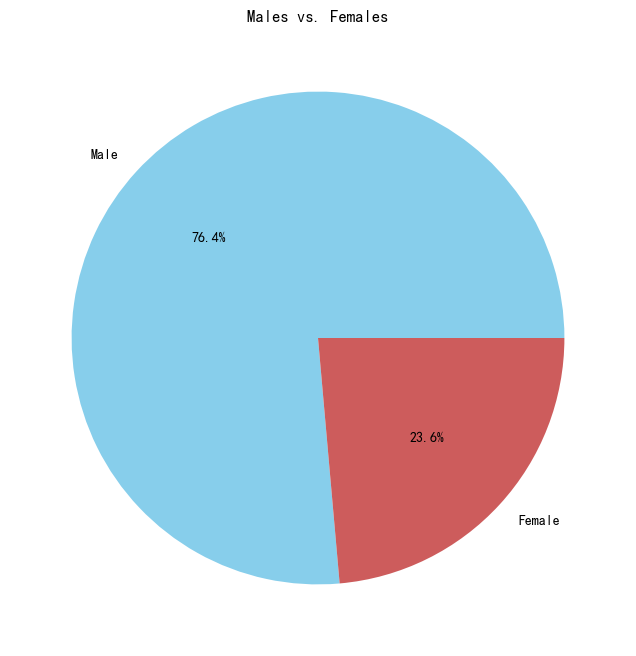

In [5]:
# 绘制会员不同性别人数的饼图
# 在下面补充代码：取data数据的GENDER列赋给变量gender
gender=data['GENDER']
# 在下面补充代码：对gender进行值计数，赋给变量numbers
#print(gender.value_counts())


numbers=gender.value_counts()

# 在下面补充代码：获取numbers中索引为“男”的会员人数，赋给male变量
male=numbers['男']

# 在下面补充代码：获取numbers中索引为“女”的会员人数，赋给female变量
female=numbers['女']

m_百分比 =round( float(male) / (male + female) *100 ,1)
f_百分比 = round( float(female) / (male + female) *100 ,1)
#print([m_百分比,f_百分比 ])
# 在下面补充代码：定义fig，设置为宽8英寸，高8寸的figure
fig = plt.figure(figsize = (8,8))
# 在下面补充代码：绘制会员性别比例饼图，标签为'Male','Female'，颜色为'SkyBlue', 'IndianRed'，显示百分比，保留一位小数
plt.pie([m_百分比,f_百分比 ],labels = ['Male','Female'] ,colors=['SkyBlue', 'IndianRed'],autopct='%.1f%%',)
# 在下面补充代码：饼图标题为'Males vs. Females'
plt.title("Males vs. Females")

plt.show()

从男女比例饼图可以看出，入会的男性明显多于女性。

FFP_TIER
4    58066
5     3409
6     1513
Name: count, dtype: int64


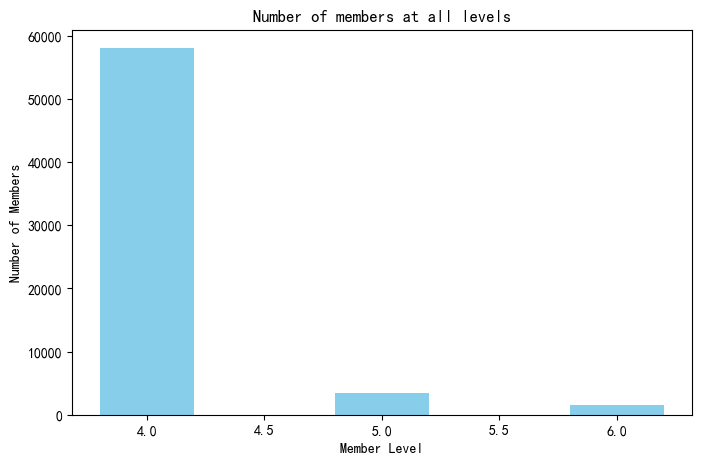

In [6]:
# 在下面补充代码：分别提取不同级别会员的人数（会员卡级别分三级，请查看原始数据获知不同级别数字）
FFP_num=data['FFP_TIER'].value_counts()
print(FFP_num)



# 在下面补充代码：定义fig，设置为宽8英寸，高5寸的figure
fig=plt.figure(figsize = (8,5))
ax2 = fig.add_subplot(1,1,1)
# 在下面补充代码：绘制会员各级别人数柱形图，柱子宽度为0.4，alpha颜色通道为0.8，颜色为'skyblue'
ax2.bar( FFP_num.index ,FFP_num.values, width = 0.4,color='skyblue' )
# 在下面补充代码：x轴坐标指定为会员级别数字

# 在下面补充代码：x轴标签设置为'Member Level'，y轴标签设置为'Number of Members'，柱形图标题为'Number of members at all levels'
plt.xlabel('Member Level')
plt.ylabel('Number of Members')
plt.title('Number of members at all levels')



plt.show()

从会员各级人数直方图可以看出，绝大部分会员为4级，仅有少数为5级和6级会员。

0        31
1        42
2        40
3        64
4        48
         ..
62983    25
62984    38
62985    43
62986    36
62987    29
Name: AGE, Length: 62568, dtype: Int64


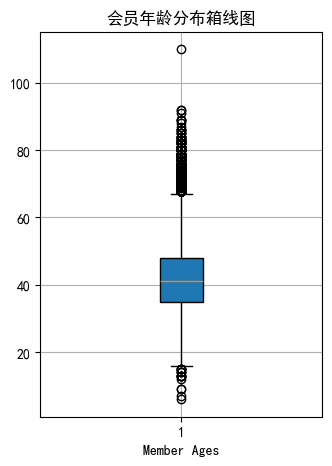

In [7]:
# 在下面补充代码：提取data数据的'AGE'列，去除空值，赋给age变量
age=data['AGE'].dropna()

# 在下面补充代码：将age转换为int64类型
age=age.convert_dtypes()
print(age)
# 在下面补充代码：定义fig，设置为宽8英寸，高5寸的figure
fig=plt.figure(figsize = (8,5))
ax3=fig.add_subplot(1,2,1)
# 在下面补充代码：绘制会员年龄分布箱线图，设置填充颜色为'lightblue'，设置x轴标题为'Member Ages'
ax3.boxplot(age, patch_artist={'color':'lightblue'})
plt.xlabel('Member Ages')
# 在下面补充代码：设置图标题为“会员年龄分布箱线图”
plt.title("会员年龄分布箱线图")
# 在下面补充代码：显示y坐标轴的网格线
plt.grid(True) 
plt.show()

从会员年龄分布箱型图可以看出，大部分会员年龄集中在30～50岁之间，极少量的会员年龄小于20岁或高于60岁，且存在一个超过100岁的异常数据。

**（2）客户乘机信息分布分析**

选取最后一次乘机至结束的时长、客户乘机信息中飞行次数、总飞行公里数进行探索分析，探索客户的乘机信息分布状况，代码如下。

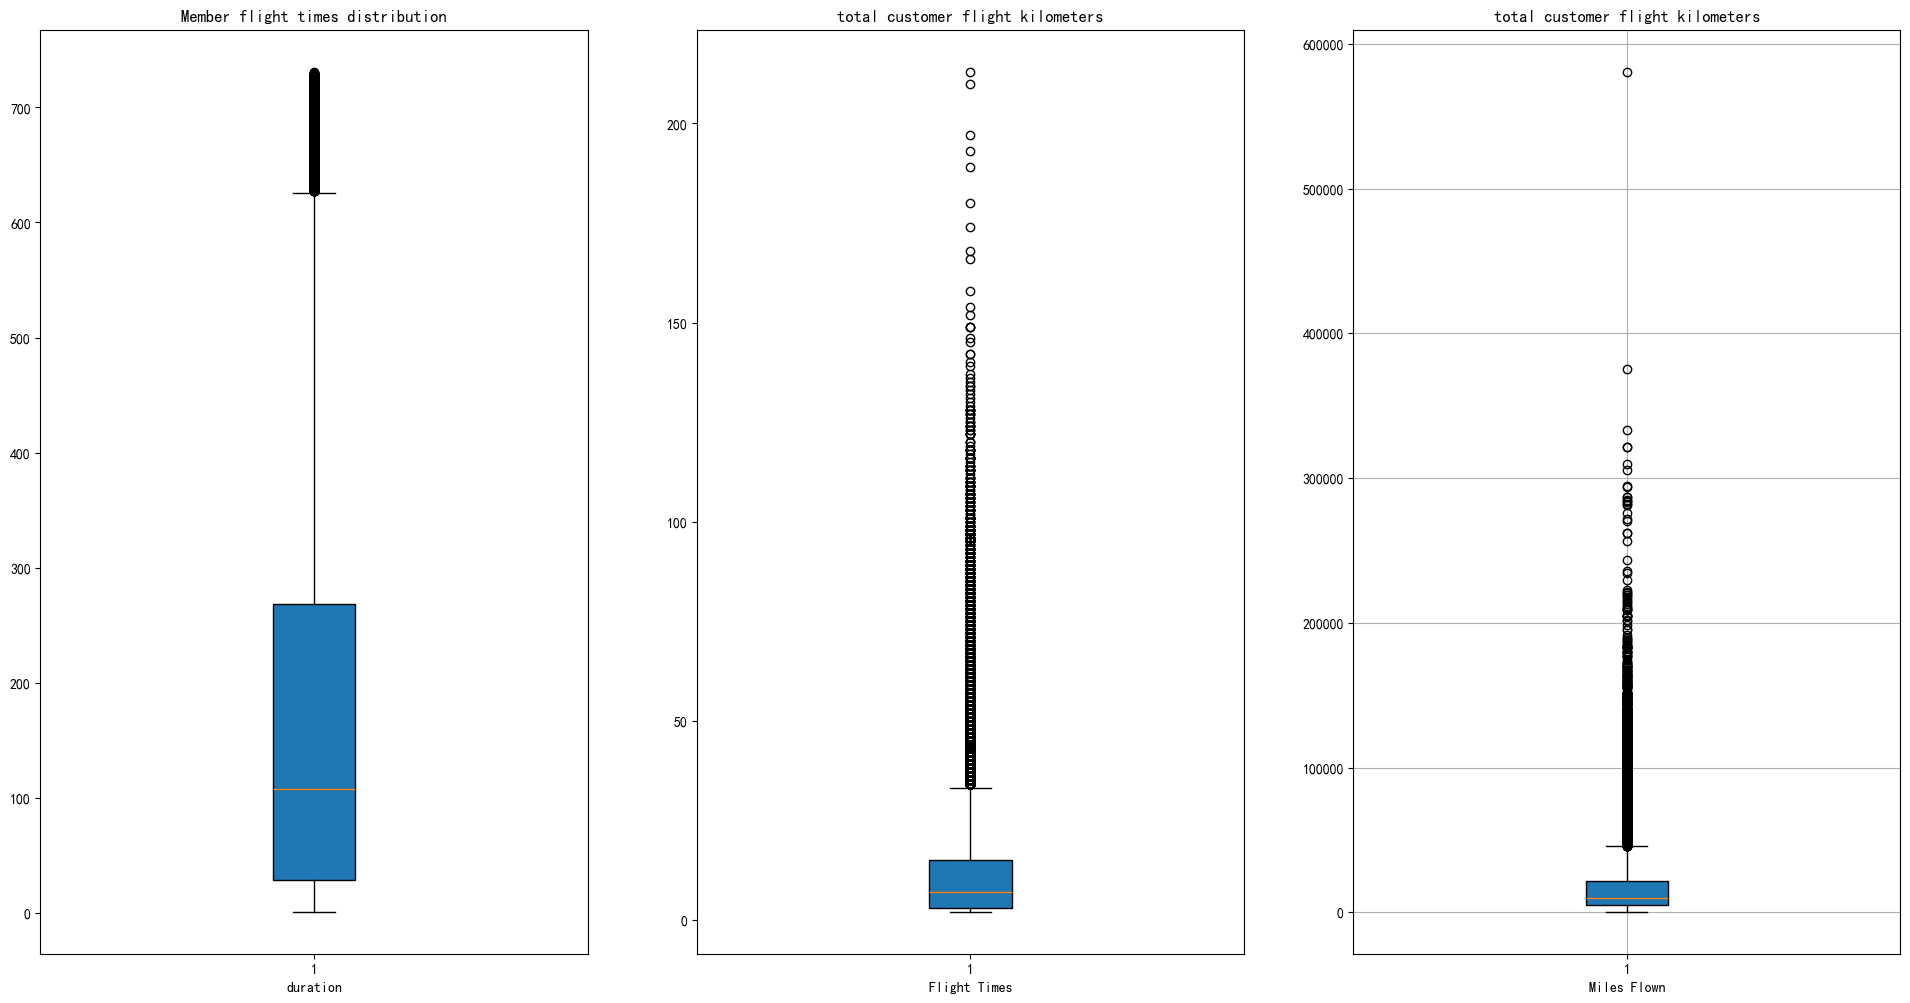

In [8]:
# 在下面补充代码：选取最后一次乘机至结束的时长赋给变量lte，选取客户乘机信息中飞行次数赋给变量fc，选取总飞行公里数赋给变量sks

lte=data['LAST_TO_END']
fc=data['FLIGHT_COUNT']
sks=data['SEG_KM_SUM']




# 在下面补充代码：定义fig，设置为宽24英寸，高12寸的figure
fig=plt.figure(figsize=(24,12))
# 在下面补充代码：将fig分成1行3列的子图
ax4=fig.add_subplot(1,3,1)



# 在下面补充代码：在第一个子图上绘制最后乘机至结束时长箱线图，设置x轴标签为'duration'，填充颜色为'GreenYellow'
ax4.boxplot(lte, patch_artist={'color':'GreenYellow'})
plt.xlabel('duration')

# 在下面补充代码：设置第一个子图标题为'Member flight times distribution'
plt.title('Member flight times distribution')
# 在下面补充代码：在第二个子图上绘制客户飞行次数箱线图，设置x轴标签为'Flight Times'，填充颜色为'lightblue'
ax5=fig.add_subplot(1,3,2)
ax5.boxplot(fc, patch_artist={'color':'lightblue'})
plt.xlabel('Flight Times')
# 在下面补充代码：设置第二个子图标题为'total customer flight kilometers'
plt.title('total customer flight kilometers')
# 在下面补充代码：在第三个子图上绘制客户总飞行公里数箱线图，设置x轴标签为'Miles Flown'，填充颜色为'Gold1'
ax6=fig.add_subplot(1,3,3)
ax6.boxplot(sks, patch_artist={'color':'Gold1'})
plt.xlabel('Miles Flown')
# 在下面补充代码：设置第三个子图标题为'total customer flight kilometers'
plt.title('total customer flight kilometers')
# 在下面补充代码：显示y坐标轴的网格线

plt.grid(True) 
plt.show()

根据上述第1个箱线图，客户的入会时长主要分布在50~300区间内，另外有一部分客户群体的人会时长分布在600 以上的区间，可分为两个群体。根据第2，3个箱线图，客户的飞行次数与总飞行公里数也明显地分为两个群体，大部分客户集中在箱型图下方的箱体中，少数客户分散分布在箱体上界的上方，这部分客户很可能是高价值客户，因为其飞行次数和总飞行公里数明显超过箱体内的其他客户。

**（3）客户积分信息分布分析**

选取积分兑换次数、总累计积分进行探索分析，探索客户的积分信息分布状况，代码如下。

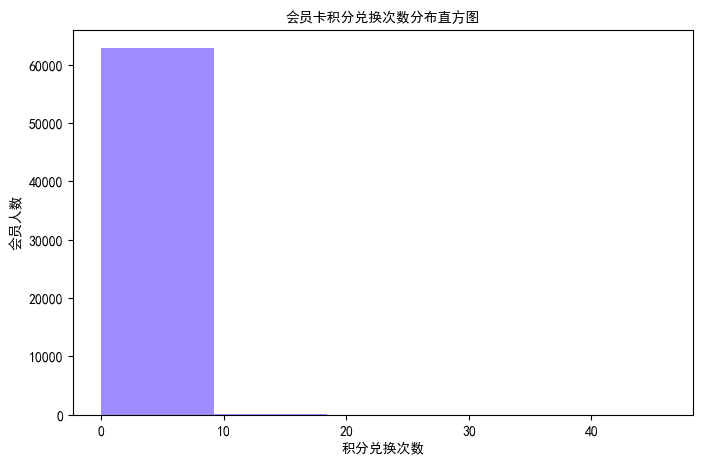

In [9]:
# 在下面补充代码：提取会员积分兑换次数列，赋给ec变量
ec=data['EXCHANGE_COUNT']

# 在下面补充代码：定义fig，设置为宽8英寸，高5寸的figure
fig=plt.figure(figsize=(8,5))
ax7=fig.add_subplot(1,1,1)
# 在下面补充代码：绘制会员兑换积分次数直方图，直方数目为5，颜色为#8470FF

ax7.hist(ec,bins=5,color='#8470FF',alpha=0.8)
# 在下面补充代码：直方图x轴标签为“兑换次数”，y轴标签为“会员人数”
plt.xlabel('积分兑换次数',fontsize=10)
plt.ylabel('会员人数',fontsize=10)
# 在下面补充代码：设置图标题为“兑换积分会员分布”
plt.title('会员卡积分兑换次数分布直方图',fontsize=10)
plt.show()

通过直方图看出，绝大部分客户的兑换次数在0~10的区间内，这表示大部分客户都很少进行积分兑换。

#### 相关性分析

客户信息属性之间存在相关性，选取入会时间、会员卡级别、客户年龄。飞行次数。总飞行公里数、最近一次乘机至结束时长、积分兑换次数、总累计积分属性，通过相关系数矩阵与热力图分析各属性间的相关性，代码如下。

In [10]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")
# 在下面补充代码：从data中提取会员卡级别、飞行次数、最近一次乘机至结束时长、总飞行公里数、积分兑换次数、总累计积分属性，赋给data_corr变量
data_corr=data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END','SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]

# 在下面补充代码：从data中提取客户年龄属性值，将空值填充为0，赋给age1变量
age1=data['AGE'].fillna('0')

age1=age1.convert_dtypes()

# 在下面补充代码：给data_corr添加一列'AGE'，将age1转为int64类型后作为该列列值
data_corr=pd.concat([data_corr, pd.DataFrame(columns=['AGE'])], sort=False)
data_corr['AGE']=age1
# 在下面补充代码：给data_corr添加一列'FFP_YEAR'，将会员入会年份ffp_year作为该列列值
data_corr=pd.concat([data_corr,pd.DataFrame(columns=['FFP_YEAR'])], sort=False)
data_corr['FFP_YEAR']=ffp_year
data_corr.head()
# 在下面补充代码：输出data_corr的前五行


,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,SEG_KM_SUM,EXCHANGE_COUNT,Points_Sum,AGE,FFP_YEAR
0,6.0,210.0,1.0,580717.0,34.0,619760.0,31.0,2006
1,6.0,140.0,7.0,293678.0,29.0,415768.0,42.0,2007
2,6.0,135.0,11.0,283712.0,20.0,406361.0,40.0,2007
3,5.0,23.0,97.0,281336.0,11.0,372204.0,64.0,2008
4,6.0,152.0,5.0,309928.0,27.0,338813.0,48.0,2009


In [11]:
# 在下面补充代码：计算dt_corr的相关性矩阵dt_corr，相关性计算采用皮尔森方法
dt_corr = data_corr.corr(method='pearson')

print('相关性矩阵为：\n')
dt_corr

相关性矩阵为：



,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,SEG_KM_SUM,EXCHANGE_COUNT,Points_Sum,AGE,FFP_YEAR
FFP_TIER,1.000000,0.582447,-0.206313,0.522350,0.342355,0.559249,0.076245,-0.116510
FLIGHT_COUNT,0.582447,1.000000,-0.404999,0.850411,0.502501,0.747092,0.075309,-0.188181
LAST_TO_END,-0.206313,-0.404999,1.000000,-0.369509,-0.169717,-0.292027,-0.027654,0.117913
SEG_KM_SUM,0.522350,0.850411,-0.369509,1.000000,0.507819,0.853014,0.087285,-0.171508
EXCHANGE_COUNT,0.342355,0.502501,-0.169717,0.507819,1.000000,0.578581,0.032760,-0.216610
Points_Sum,0.559249,0.747092,-0.292027,0.853014,0.578581,1.000000,0.074887,-0.163431
AGE,0.076245,0.075309,-0.027654,0.087285,0.032760,0.074887,1.000000,-0.242579
FFP_YEAR,-0.116510,-0.188181,0.117913,-0.171508,-0.216610,-0.163431,-0.242579,1.000000


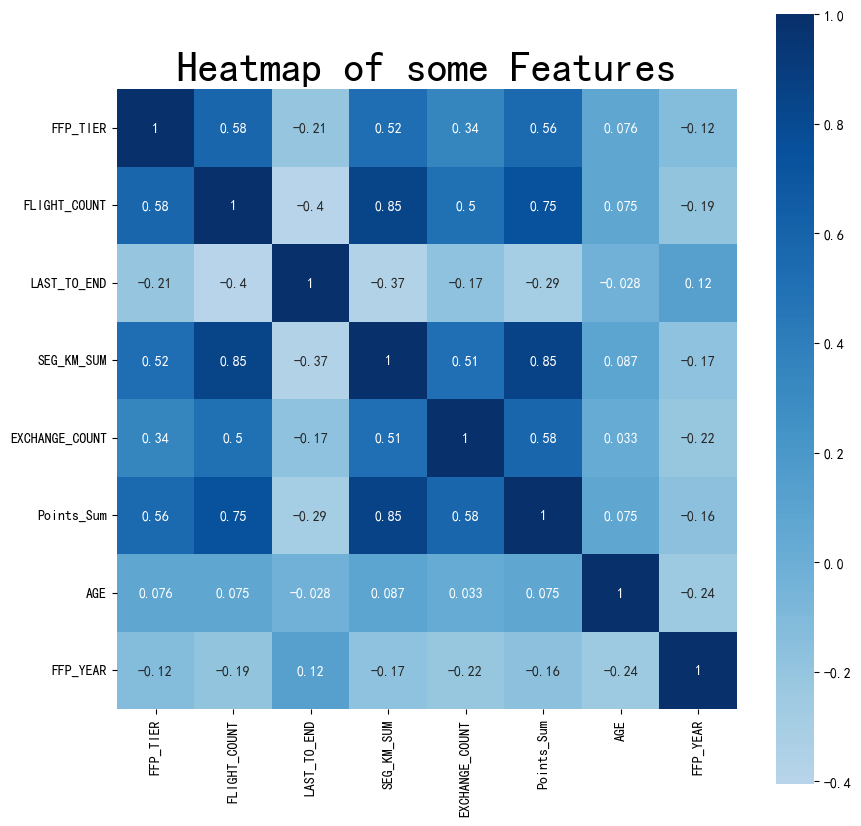

In [12]:
# 在下面补充代码：导入seaborn库，别名为sns
import seaborn as sns
# 在下面补充代码：定义fig，设置为宽10英寸，高10寸的figure
fig=plt.figure(figsize=(10,10))
# 在下面补充代码：根据dt_corr画热力图heatmap，颜色映射采用'Blues'
sns.heatmap(dt_corr,
           annot=True,
           square= True,
            center=0,
            cmap='Blues'
           )
plt.title("Heatmap of some Features", fontsize = 30)
plt.show()

从相关系数矩阵和热力图可以看出，部分属性间具有较强的相关性，如FLIGHT COUNT（飞行次数）属性与SEG_KM_SUM（飞行总公里数）属性;也有部分属性与其他属性的相关性都较弱，如AGE（年龄）属性与 EXCHANGE COUNT（积分兑换次数）属性。

### 数据预处理

本实践项目主要采用**数据清洗**、**属性归约**与**数据变换**的预处理方法。

#### 数据清洗
观察数据发现，原始数据中存在票价为空值、票价最小值为0、折扣率最小值为0、总飞行公里数大于0的记录。票价为空值的数据可能是客户不存在乘机记录造成的。其他的数据可能是客户乘坐0折机票或者积分兑换造成的。由于原始数据量大，这类数据所占比例较小，对于问题影响不大，因此对其进行丢弃处理。同时，在进行数据探索时，发现部分年龄大于100的记录，也进行丢弃处理，具体处理方法如下：
1. 丢弃票价为空的记录。
2. 保留票价不为0的，或者平均折扣率不为0且总飞行公里数大于0的记录。
3. 丢弃年龄大于100的记录。

使用`pandas`对满足清洗条件的数据进行丢弃，处理方法为满足清洗条件的一行数据全部丢弃，代码如下。

In [13]:
# 处理缺失值与异常值
import numpy as np
import pandas as pd

# 航空原始数据路径
datafile = 'data1/air_data.csv'
# 数据清洗后保存的文件路径
cleanedfile = 'data1/data_cleaned.csv'

# 在下面补充代码：读取datafile数据，赋给airline_data，编码为'utf-8'
airline_data= pd.read_csv(datafile,encoding='utf-8')
# 在下面补充代码：打印airline_data形状
print(airline_data.shape)

(62988, 44)


In [14]:
# 在下面补充代码：SUM_YR_1列和SUM_YR_2为票价列，去除票价为空的行，赋给airline_notnull
airline_notnull=data.dropna(axis=0,subset=['SUM_YR_1','SUM_YR_2'])
# 在下面补充代码：打印airline_notnull的形状
print(airline_notnull.shape)

(62299, 44)


In [15]:
# 只保留票价非零的，或者平均折扣率不为0且总飞行公里数大于0的记录
index1 = airline_notnull['SUM_YR_1'] != 0
index2 = airline_notnull['SUM_YR_2'] != 0
# 在下面补充代码：将airline_notnull中平均折扣率不为0且总飞行公里数大于0的布尔Series赋给index3
index3=(airline_notnull['avg_discount']!=0 )& (airline_notnull['SEG_KM_SUM'] >0)
# 在下面补充代码：将airline_notnull中年龄大于100的布尔Series赋给index4
index4=airline_notnull['AGE']>100
# 在下面补充代码：将airline_notnull中票价非0、平均折扣率不为0、总飞行公里数大于0，且年龄小于等于100的数据赋给airline变量
airline = airline_notnull[(index1|index2 ) & index3 & ~index4]
print('数据清洗后数据的形状为:',airline.shape)

# 在下面补充代码：保存清洗后的数据到cleanedfile中
airline.to_csv('data1/data_cleaned.csv')


数据清洗后数据的形状为: (62043, 44)


#### 属性归约
本实践项目的目标是客户价值分析，即通过航空公司客户数据识别不同价值的客户。识别客户价值应用最广泛的模型是RFM模型。

**（1）RFM模型**

**R（Recency）** 指的是最近一次消费时间与截止时间的间隔。通常情况下，客户最近一次消费时间与截止时间的间隔越短，对即时提供的商品或是服务也最有可能感兴趣。这也是为什么消费时间间隔0~6个月的顾客收到的沟通信息多于1年以上的顾客的原因。
最近一次消费时间与截止时间的间隔不仅能够为确定促销客户群体提供依据，还能够从中得出企业发展的趋势。如果分析报告显示最近一次消费时间很近的客户在增加，则表示该公司是个稳步上升的公司。反之，最近一次消费时间很近的客户越来越少，则说明该公司需要找到问题所在，及时调整营销策略。

**F（Frequency）** 指客户在某段时间内所消费的次数。可以说消费频率越高的客户，其满意度越高，其忠诚度也就越高，客户价值也就越大。增加客户购买的次数意味着从竞争对手处"偷取"市场占有率，赚取营业额。商家需要做的是通过各种营销方式，不断地去刺激客户消费，提高他们的消费频率，提升店铺的复购率。

**M（Monetary）** 指客户在某段时间内所消费的金额。消费金额越大的顾客其消费能力自然也就越大，这就是所谓的"20%的客户贡献了80%的销售额"的二八法则。而这批客户也必然是商家在进行营销活动时需要特别照顾的群体，尤其是在商家前期资源不足的时候。不过需要注意一点∶不论采用哪种营销方式，以不对客户造成骚扰为大前提，否则营销只会产生负面效果。
在RFM模型理论中，最近一次消费时间与截止时间的间隔、消费频率、消费金额是测算客户价值最重要的特征，这3个特征对营销活动具有十分重要的意义。其中，近一次消费时间与截止时间的间隔是最有力的特征。

**（2）RFM模型结果解读**

RFM模型包括3个特征，但无法用平面坐标系来展示，所以这里使用三维坐标系进行展示，如下图所示，**x轴**表示**R特征**（Recency），**y轴**表示**F特征**（Frequency），**z轴**表示**M指标**（Monetary）。每个坐标轴一般会用5级表示程度，1为最小，5为最大。需要特别说明的是R特征。在x轴上，R值越大，代表该类客户最近一次消费与截止时间的消费间隔越短，客户R维度上的质量越好。在每个轴上划分5个等级，等同于将客户划分成5×5×5=125种类型。这里划分为5级并不是严格的要求，一般是根据实际研究需求和客户的总量进行划分的，对于是否等分的问题取决于该维度上客户的分布规律。
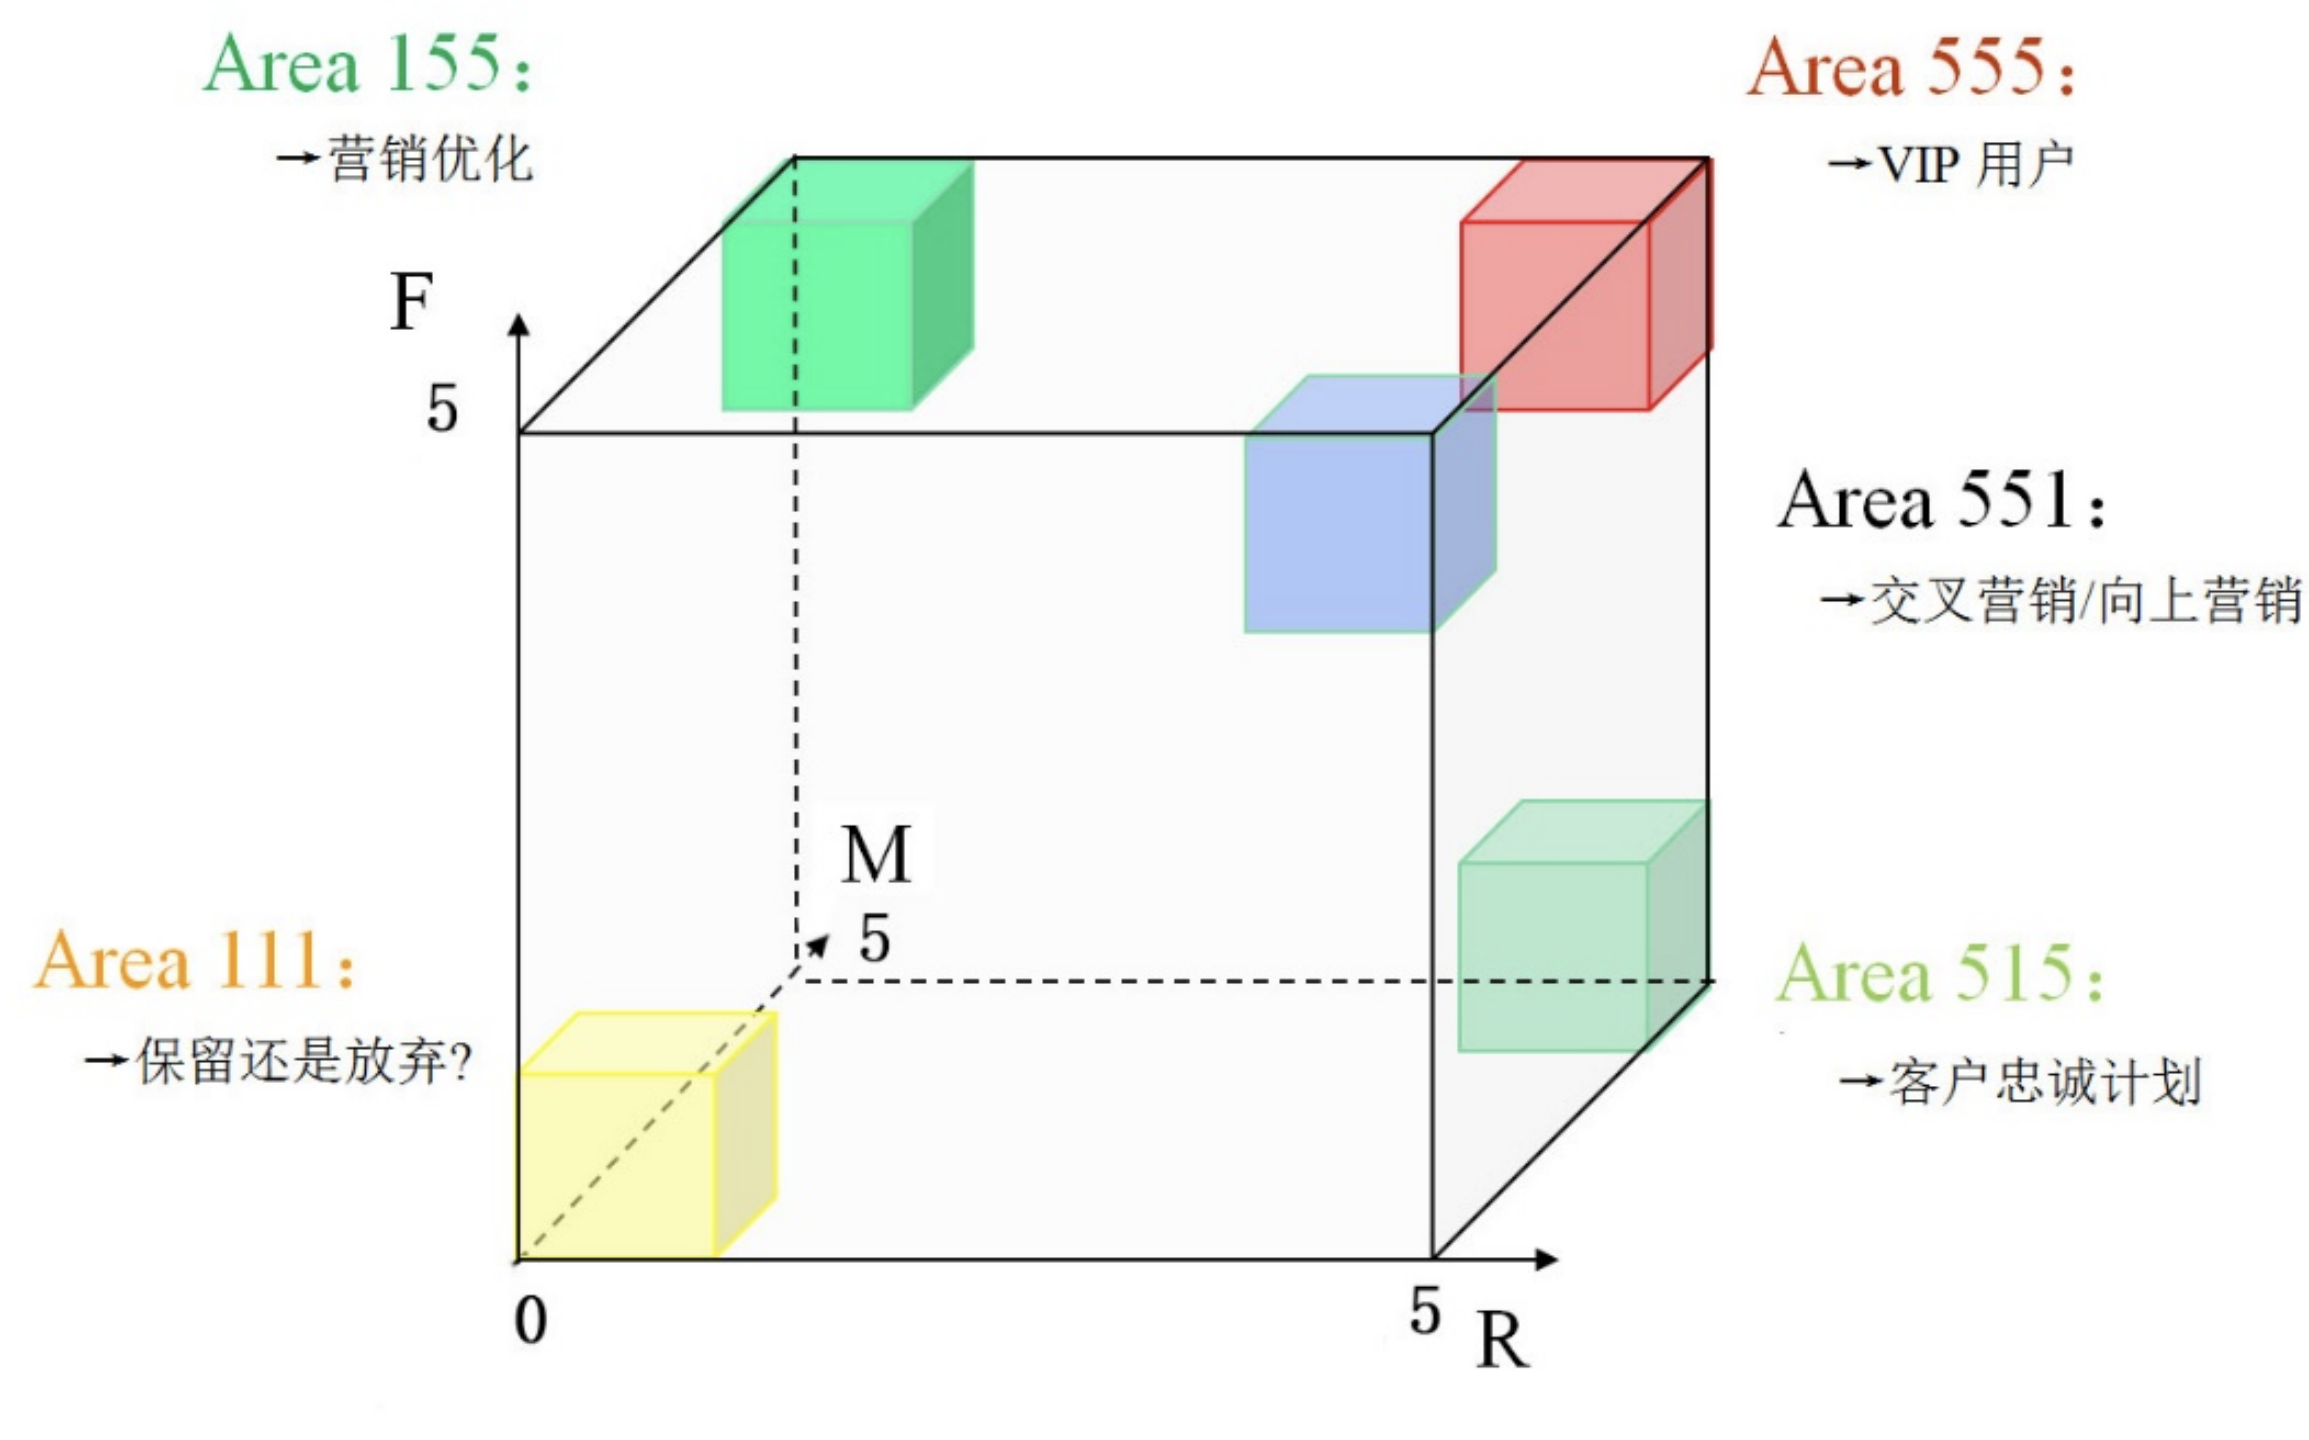
在上图，左上角方框的客户RFM特征取值为155。R值是比较小的，说明该类客户最近都没有来店消费，原因可能是最近比较忙，或者对现有的产品或服务不满意，或者是找到了更好的商家。R特征数值变小就需要企业管理人员引I起重视说朋该类客户可能流失，会对企业造成损失。消费频率F很高，说明客户很活跃，经常到商家店里消费。消费金额M值很高，说明该类客户具备一定的消费能力。为店里贡献了很多的营业额。这类客户总体分析比较优质，但是 R特征时间近度值较小，其往往是需要营销优化的客户群体。
同理，若客户RFM特征取值为555。则可以判定该客户为最优质客户，即这类客户最近到商家消费过，消费频率很高，消费金额很大。这类客户往往是企业利益的主要贡献者，需要重点关注与维护。

**（3）航空公司客户价值分析的LRFMC模型**

在RFM模型中，消费金额表示在一段时间内客户购买该企业产品的金额的总和。由于航空票价受到运输距离、舱位等级等多种因素的影响，同样消费金额的不同旅客对航空公司的价值是不同的，例如，一位购买长航线、低等级舱位票的旅客与一位购买短航线、高等级舱位票的旅客相比，后者对于航空公司而言更有价值。因此这个特征并不适用于航空公司的客户价值分析9。本案例选择客户在一定时间内累积的飞行里程M和客户在一定时间内乘坐舱位所对应的折扣系数的平均值C两个特征代替消费金额。此外，航空公司会员入会时间的长短在一定程度上能够影响客户价值，所以在模型中增加客户关系长度L，作为区分客户的另一特征。
本实践项目将客户关系长度L、消费时间间隔R、消费频率F、飞行里程M和折扣系数的平均值C这5个特征作为航空公司识别客户价值的特征，记为**LRFMC**模型。


|模型|L|R|F|M|C|
|:--|:--|:--|:--|:--|:--|
|航空公司LRFMC模型|会员入会时间距观测窗口结束的月数|客户最近一次乘坐公司飞机距观测窗口结束的月数|客户在观测窗口内乘坐公司飞机的次数|客户在观测窗口内累计的飞行里程|客户在观测窗口内乘坐舱位所对应的折扣系数的平均值|

原始数据中属性太多，根据航空公司客户价值 LRFMC模型，选择与LRFMC指标相关的6个属性∶FFP DATE、LOAD TIME、FLIGHT COUNT、AVG DISCOUNT、SEG_KM SUM、LAST TO END。删除与其不相关、弱相关或冗余的属性，如会员卡号、性别、工作地城市、工作地所在省份、工作地所在国家、年龄等属性。属性选择的代码如
代码清单7-7所示。



In [16]:
# 属性选择、构造与数据标准化
import pandas as pd
import numpy as np

# 数据清洗后保存的文件路径
cleanedfile = 'data1/data_cleaned.csv'  
# 在下面补充代码：读取清洗后的数据赋给airline变量
airline=pd.read_csv(cleanedfile,encoding='utf-8')
# 在下面补充代码：从airline中提取属性'FFP_DATE','LOAD_TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount'数据，赋给airline_selection
airline_selection=airline[['FFP_DATE','LOAD_TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
# 在下面补充代码：打印airline_selection的前5行数据
airline_selection.head()

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2006/11/2,2014/3/31,1,210,580717,0.961639
1,2007/2/19,2014/3/31,7,140,293678,1.252314
2,2007/2/1,2014/3/31,11,135,283712,1.254676
3,2008/8/22,2014/3/31,97,23,281336,1.090870
4,2009/4/10,2014/3/31,5,152,309928,0.970658


#### 数据变换

数据变换是将数据转换成"适当的"格式，以适应挖掘任务及算法的需要。本实践项目中主要采用的数据变换方式有**属性构造**和**数据标准化**。
由于原始数据中并没有直接给出 LRFMC5个指标，所以需要通过原始数据提取这5个指标具体如下∶

1. 会员入会时间距观测窗口结束的月数L=会员入会时长，如式（1）所示。

$$ L=\text{FFP_LENGTH} = \text{LOAD_TIME} - \text{FFP_DATE} \tag{1}$$

2. 客户最近一次乘坐公司飞机距观测窗口结束的月数R=最后一次乘机时间至观测窗口末端时长（单位∶月），如式（2）所示。

$$ R= \text{LAST_TO_END} \tag{2}$$

3. 客户在观测窗口内乘坐公司飞机的次数F=观测窗口的飞行次数（单位:次），如式（3）所示。

$$ F = \text{FLIGHT_COUNT} \tag{3} $$

4. 客户在观测时间内在公司累计的飞行里程 M=观测窗口总飞行公里数（单位:公里），如式（4）所示。

$$ M = \text{SEG_KM_SUM} \tag{4} $$

5. 客户在观测时间内乘坐舱位所对应的折扣系数的平均值C=平均折扣率（单位:无），如式（5）所示。

$$ C = \text{AVG_DISCOUNT} \tag{5}$$

在完成5个指标的数据提取后，对每个指标数据的分布情况进行分析，其数据的取值范围如下表所示。从表中数据可以发现，5个指标的取值范围数据差异较大，为了消除数量级数据带来的影响，需要对数据进行标准化处理。

|属性名称|L|R|F|M|C|
|:--:|:--:|:--:|:--:|:--:|:--:|
|最小值|12.23|0.03|2|368|0.14|
|最大值|114.63|24.37|213|580717|1.5|

属性构造与数据标准化的代码如下。

In [17]:
# 在下面补充代码：利用pandas的to_datetime函数将LOAD_TIME和FFP_DATE列数据转换为时间类型，再用公式（1）计算出属性L

L = pd.to_datetime(airline['LOAD_TIME']) - pd.to_datetime(airline['FFP_DATE'])
L = L.astype('str').str.split().str[0]
L = L.astype('int')/30
# 在下面补充代码：将L与airline_selection中的后4列进行横向合并，赋给airline_features
airline_features=pd.concat([L,airline_selection.iloc[:,2:]],axis=1)

# 在下面补充代码：将airline_features的列重命名为'L','R','F','M','C'
airline_features.columns=['L','R','F','M','C']
print('构建的LRFMC属性前5行为：\n')
# 在下面补充代码：打印airline_features的前5行
airline_features.head()

构建的LRFMC属性前5行为：



,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658


In [18]:
# 数据标准化
# 在下面补充代码：导入sklearn中的标准化函数StandardScaler
from sklearn.preprocessing import StandardScaler
# 在下面补充代码：利用训练模型对特征进行数据转换，赋给data

data = StandardScaler().fit_transform(airline_features)
# 将data存入airline_scale.npz文件
f = open('data1/airline_scale.npz', 'w')
np.savez('data1/airline_scale.npz',data)
print('标准化后LRFMC五个属性为：\n', data[:5,:])

标准化后LRFMC五个属性为：
 [[ 1.43579256 -0.94493902 14.03402401 26.76115699  1.29554188]
 [ 1.30723219 -0.91188564  9.07321595 13.12686436  2.86817777]
 [ 1.32846234 -0.88985006  8.71887252 12.65348144  2.88095186]
 [ 0.65853304 -0.41608504  0.78157962 12.54062193  1.99471546]
 [ 0.3860794  -0.92290343  9.92364019 13.89873597  1.34433641]]


### 模型构建

客户价值分析模型构建主要由两个部分构成：第一部分，根据航空公司客户5个指标的数据，对客户作聚类分群。第二部分，结合业务对每个客户群进行特征分析，分析其客户价值，并对每个客户群进行排名。

#### 客户聚类
采用K-Means聚类算法对客户数据进行客户分群，聚成5类（需要结合业务的理解与分析来确定客户的类别数量）。
使用scikit-learn库下的聚类子库（`sklearn.cluster`）可以实现K-Means聚类算法。使用标准化后的数据进行聚类，代码如下。

In [22]:
# K-means聚类
import pandas as pd
import numpy as np
# 在下面补充代码：导入sklearn的KMeans库
from sklearn.cluster import KMeans
# 读取标准化后的数据
airline_scale =  np.load('data1/airline_scale.npz')['arr_0']
#print(airline_scale)

# 确定聚类中心数
k = 5  

# 在下面补充代码：构建Kmeans模型kmeans_model，随机种子设为123
kmeans_model=KMeans(n_clusters=k,random_state=123,tol=0.0000000000000001) 
# 在下面补充代码：用标KMeans准化后的数据训练模型，得到fit_kmeans
fit_kmeans=kmeans_model.fit(airline_scale)

# 查看聚类结果
kmeans_cc = kmeans_model.cluster_centers_
# 聚类中心
print('各类聚类中心为：\n', kmeans_cc, '\n')
# 样本的类别标签
kmeans_labels = kmeans_model.labels_
print('各样本的类别标签为：', kmeans_labels, '\n')
# 统计不同类别样本的数目
r1 = pd.Series(kmeans_model.labels_).value_counts()
print('最终每个类别的数目为：\n', r1, '\n')

各类聚类中心为：
 [[-0.7003239  -0.41464445 -0.16131376 -0.16118426 -0.25361672]
 [ 0.4829654  -0.79938586  2.48335779  2.42456891  0.30855595]
 [-0.31349451  1.68633244 -0.57398567 -0.53679148 -0.173367  ]
 [ 0.0558761  -0.00252428 -0.22551692 -0.22890896  2.1985169 ]
 [ 1.1603211  -0.37732191 -0.08715713 -0.09517918 -0.156139  ]] 

各样本的类别标签为： [1 1 1 ... 0 2 2] 

最终每个类别的数目为：
 0    24669
4    15743
2    12124
1     5336
3     4171
Name: count, dtype: int64 



In [20]:
# 在下面补充代码：创建以聚类中心为数据，'ZL','ZR','ZF','ZM','ZC'为列索引名的DataFrame，赋给cluster_center变量
cluster_center = pd.DataFrame(kmeans_cc,columns=['ZL','ZR','ZF','ZM','ZC'])
# 将样本类别作为数据帧索引
cluster_center.index = pd.DataFrame(kmeans_model.labels_ ).drop_duplicates().iloc[:,0] 
cluster_center

,ZL,ZR,ZF,ZM,ZC
0,,,,,
1,-0.700685,-0.414650,-0.161015,-0.160932,-0.254138
3,0.484471,-0.799564,2.479501,2.421422,0.308041
0,-0.315036,1.687233,-0.574085,-0.536755,-0.173587
2,0.054747,-0.001059,-0.226608,-0.230136,2.196332
4,1.159560,-0.376066,-0.088900,-0.097059,-0.156161


#### 客户价值分析

针对聚类结果进行特征分析，绘制客户分群雷达图，代码如下。

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (5).

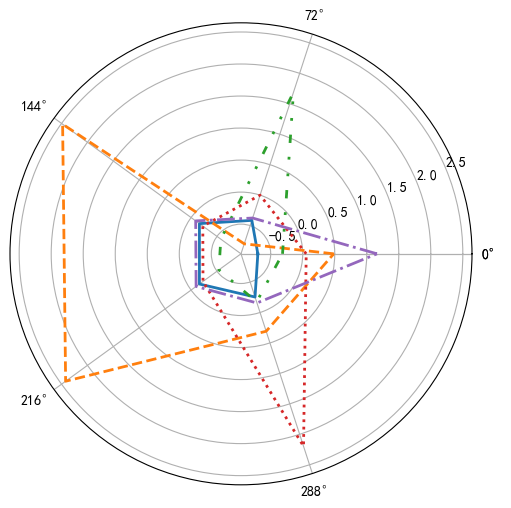

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt 
# 客户分群雷达图
labels = ['ZL','ZR','ZF','ZM','ZC']
# 客户群命名，作为雷达图的图例
legen = ['customers' + str(i + 1) for i in cluster_center.index]
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']
kinds = list(cluster_center.iloc[:, 0])
# 由于雷达图要保证数据闭合，因此再添加L列，并转换为 np.ndarray
cluster_center = pd.concat([cluster_center, cluster_center[['ZL']]], axis=1)
centers = np.array(cluster_center.iloc[:, 0:])

# 分割圆周长，并让其闭合
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))

# 绘图
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, polar=True)  # 以极坐标的形式绘制图形
# 画线
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2, label=kinds[i])
# 添加属性标签
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('Customer profile analysis radar chart')
plt.legend(legen)
plt.show()

结合业务分析，通过比较各个特征在群间的大小来对某一个群的特征进行评价分析。
其中，客户群1在特征C处的值最大，在特征 F、M处的值较小、说明客户群1是偏好乘坐高级舱位的客户群;客户群2在特征 F和 M上的值最大，日在特征R 上的值最小。说明客户群2的会员频繁乘机且近期都有乘机记录;客户群3在特征R处的值最大，在特征 L、F、M和C处的值都较小，说明客户群3已经很久没有乘机，是入会时间较短的低价值的客户群;客户群4在所有特征上的值都很小，且在特征L处的值最小，说明客户群4属于新入会员较多的客户样;客户样5在特征L处的值最大。在特征R处的值较小。其他特征值都比较适中，说明客户群5入会时间较长，飞行频率也较高，是有较高价值的客户群。
总结出每个客户群的优势和弱势特征，具体结果如下表所示。

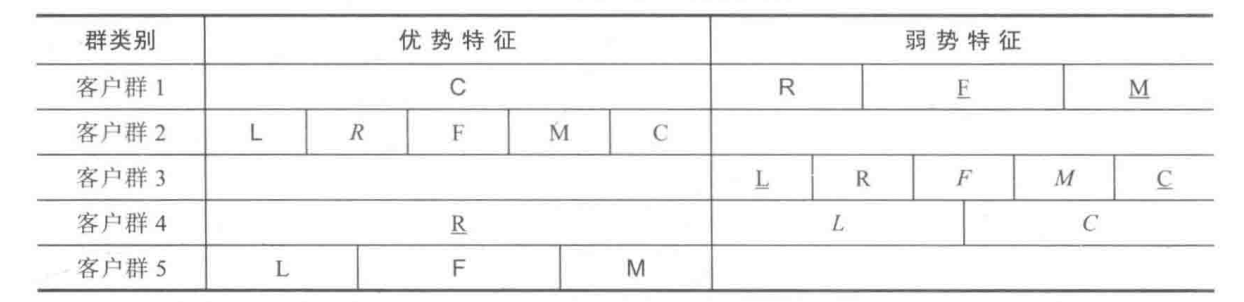

根据以上特征分析图表，说明不同用户类别的表现特征明显不同。基干该特征描述，本实践项目定义5个等级的客户类别：重要保持客户、重要发展客户、重要挽留客户一般客户与低价值客户。客户类别的特征分析如下图所示。

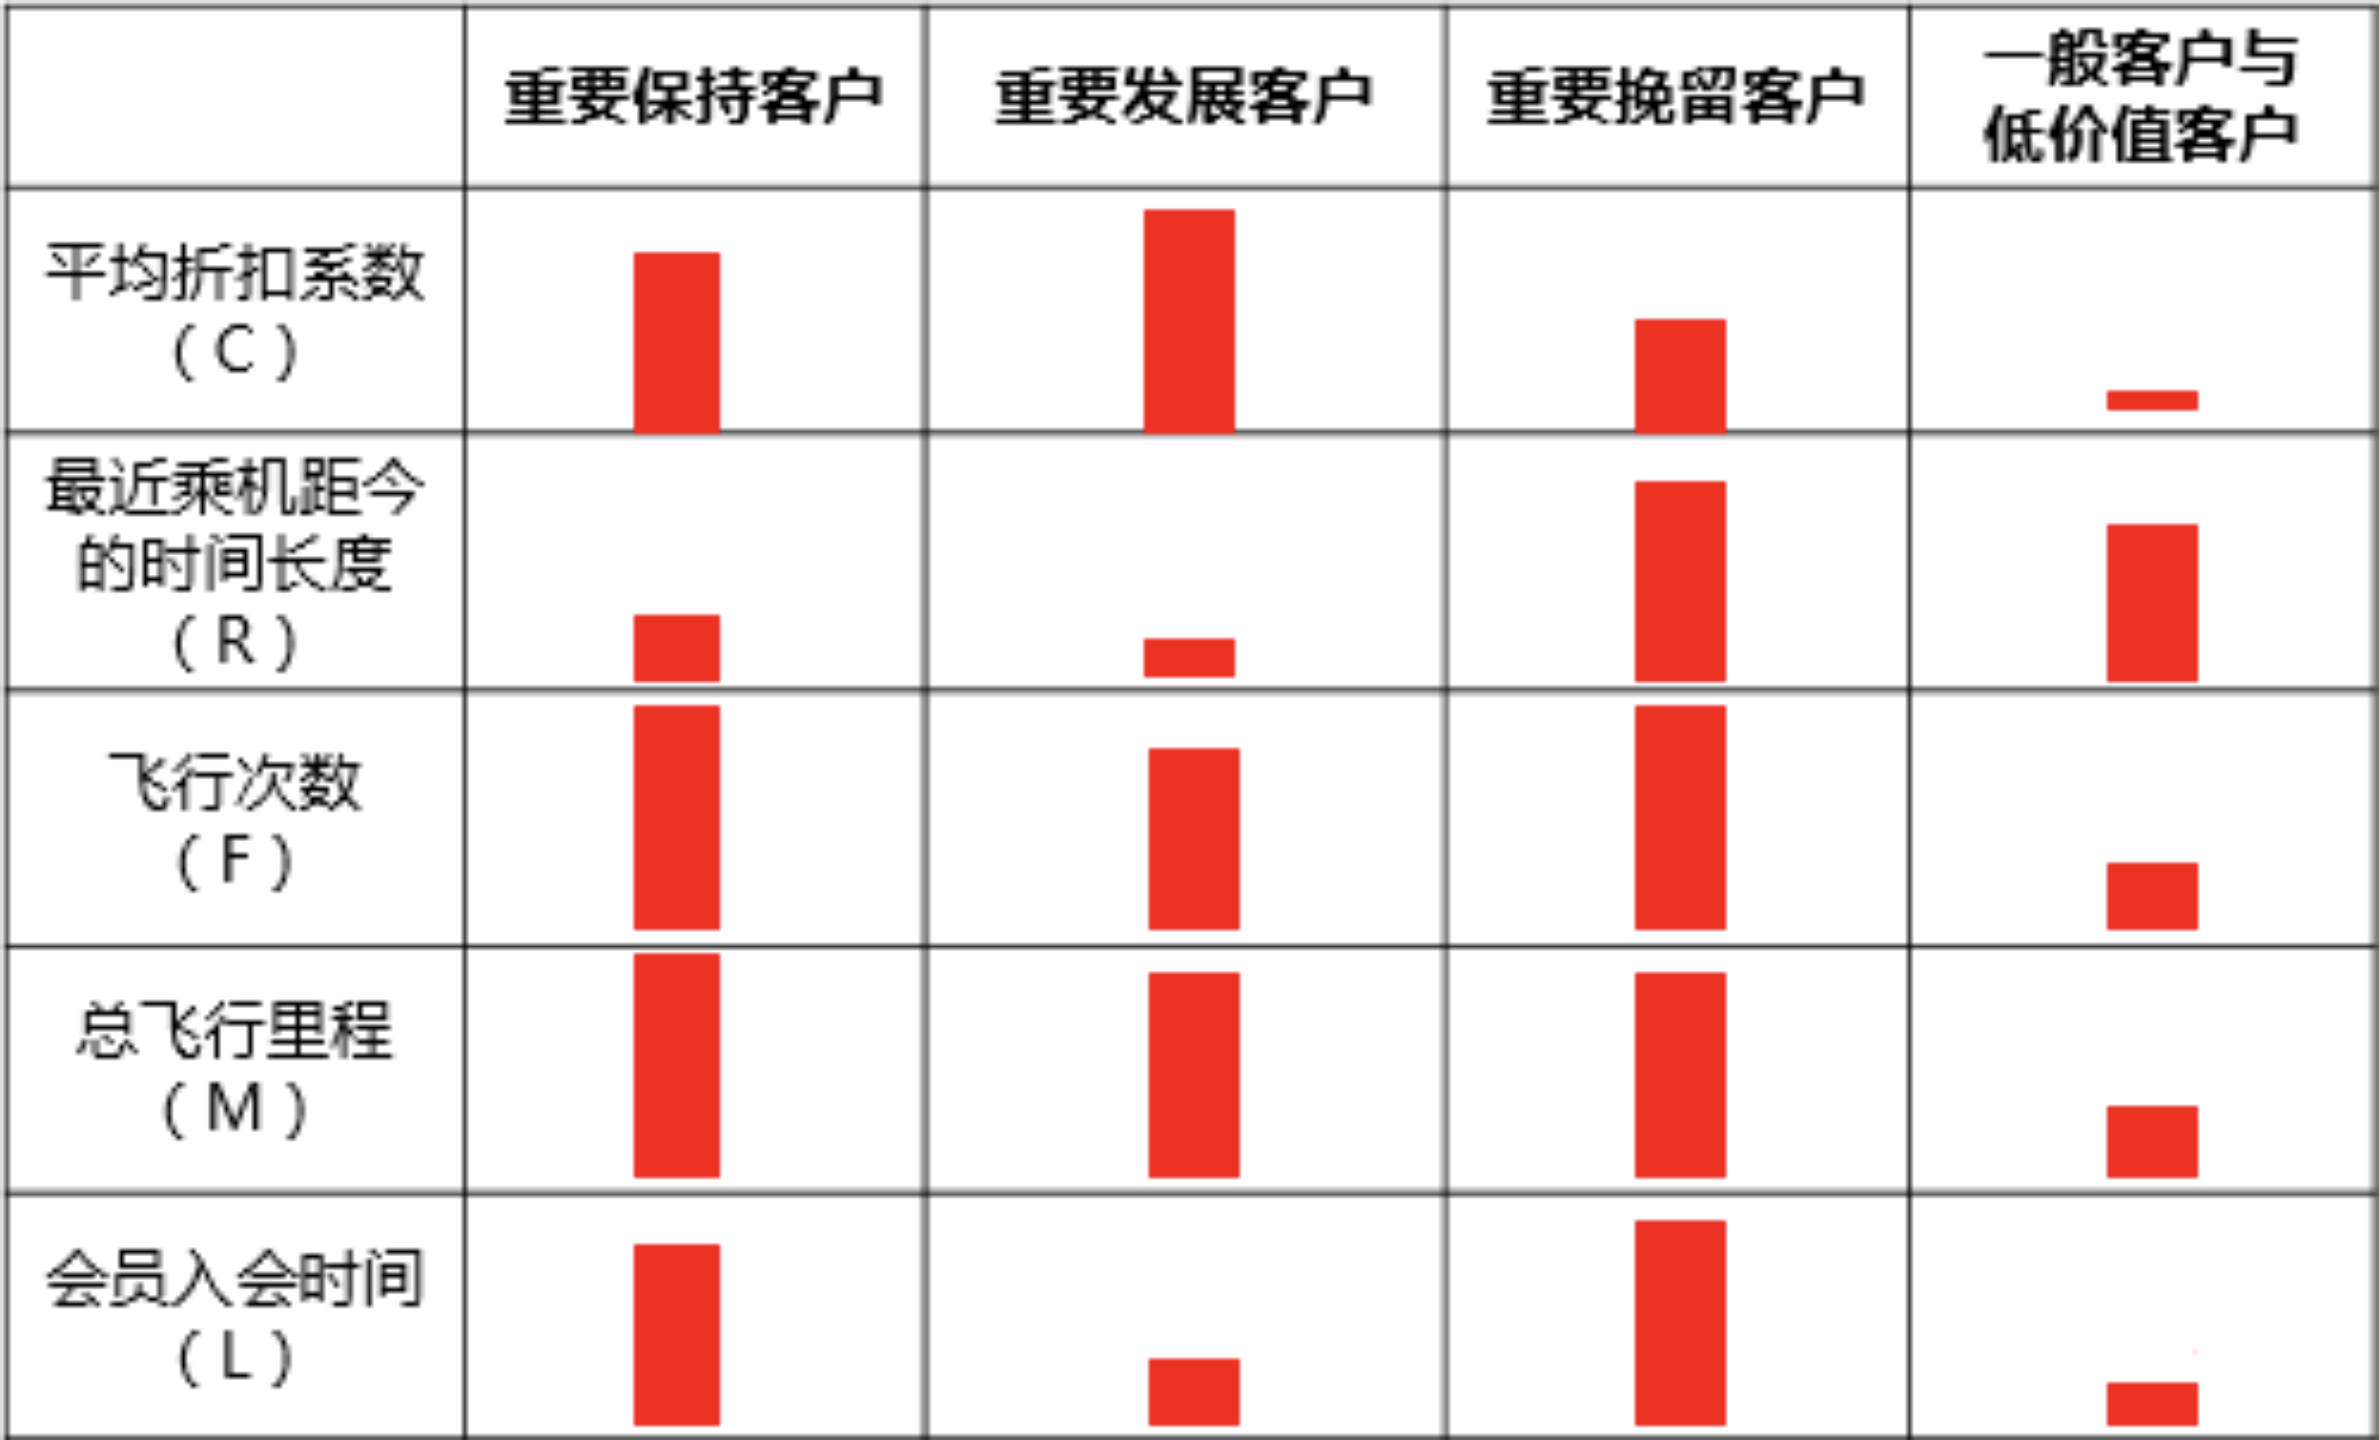